# Mohammad Katlish

# Task 3: Exploratory Data Analysis - Retial

- Finding the weak areas to improve the profit of the company
- find other Business Problems in the data  

#### Imoprting Libraries;

In [2]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

# 1sr Step of EDA - Understanding the Data

#### Import the data and show the fisrt five rows;

In [3]:
data = pd.read_csv('./Retail_data.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

`Summary statistics of the dataset`

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


`Show information about the dataset`

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


`Show datatypes in each column`

In [7]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

`Chicking for the NULL values`

In [9]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

`Chicking the negative and positive profits in the dataset`

In [10]:
#negative profit
neg_profit = data['Profit'] < 0
neg_data_df = data[neg_profit]

#postive profit
pos_profit = data['Profit'] > 0
pos_data_df = data[pos_profit]

no_proft = data['Profit'] == 0
no_data_df = data[no_proft]


print('The number of the transactions: ' + str(data['Profit'].count()))
print('The number of the negative proft in the transaction: ' + str(neg_data_df['Profit'].count()))
print('The number of the positive proft in the transaction: ' + str(pos_data_df['Profit'].count()))
print('The number of the zero proft in the transaction: ' + str(no_data_df['Profit'].count()))


The number of the transactions: 9994
The number of the negative proft in the transaction: 1871
The number of the positive proft in the transaction: 8058
The number of the zero proft in the transaction: 65


`Chicking for dublicated data` -- boolean

In [11]:
data.duplicated().sum()

17

In [12]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

`checking the number of uniqie data`

In [13]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

-----

# 2nd Step of EDA - Identify Events

#### Corrlation Analysis

In [14]:
data.corr(numeric_only=True)

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


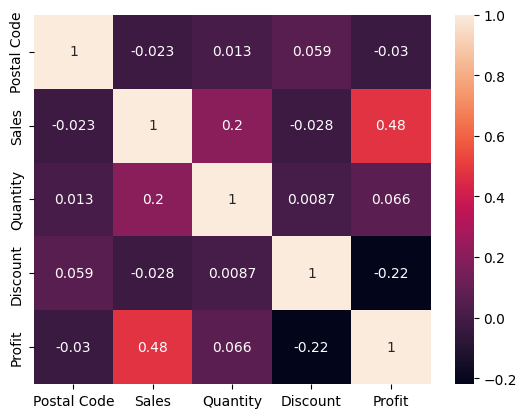

In [15]:
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.rcParams['figure.figsize'] =(35,15)
plt.show()

In [16]:
data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: count, dtype: int64

/tmp/ipykernel_19619/2179410785.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Ship Mode'], palette = 'rainbow')


<Axes: xlabel='Ship Mode', ylabel='count'>

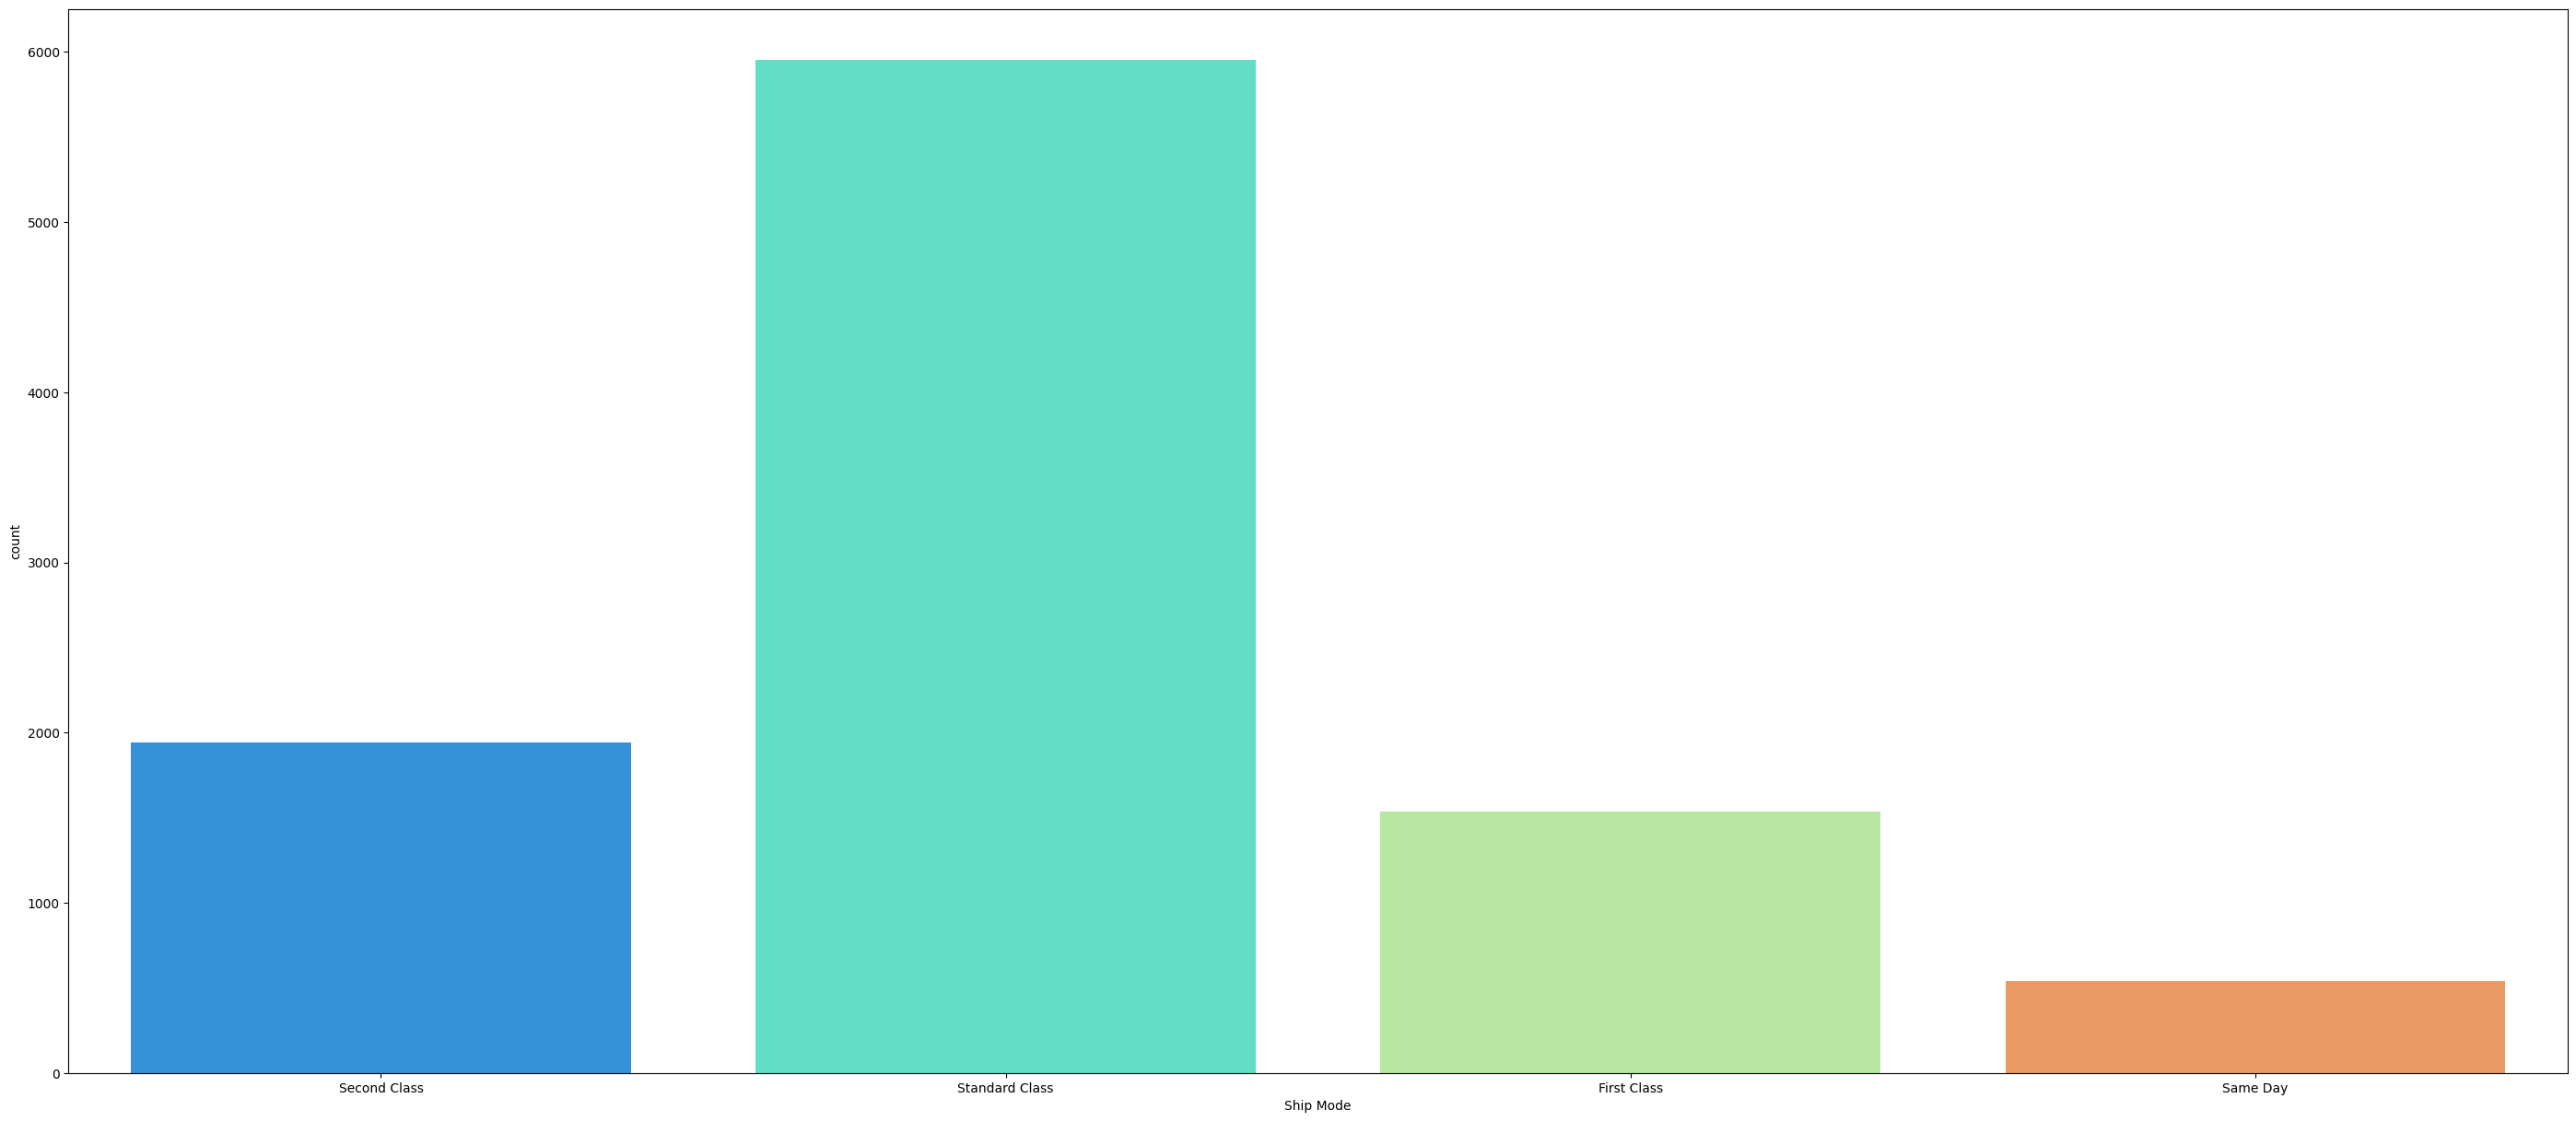

In [17]:
sns.countplot(x=data['Ship Mode'], palette = 'rainbow')


In [18]:
data['Segment'].value_counts() 

Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: int64

#### Category

/tmp/ipykernel_19619/437810784.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, palette='tab10')


<Axes: xlabel='Category', ylabel='count'>

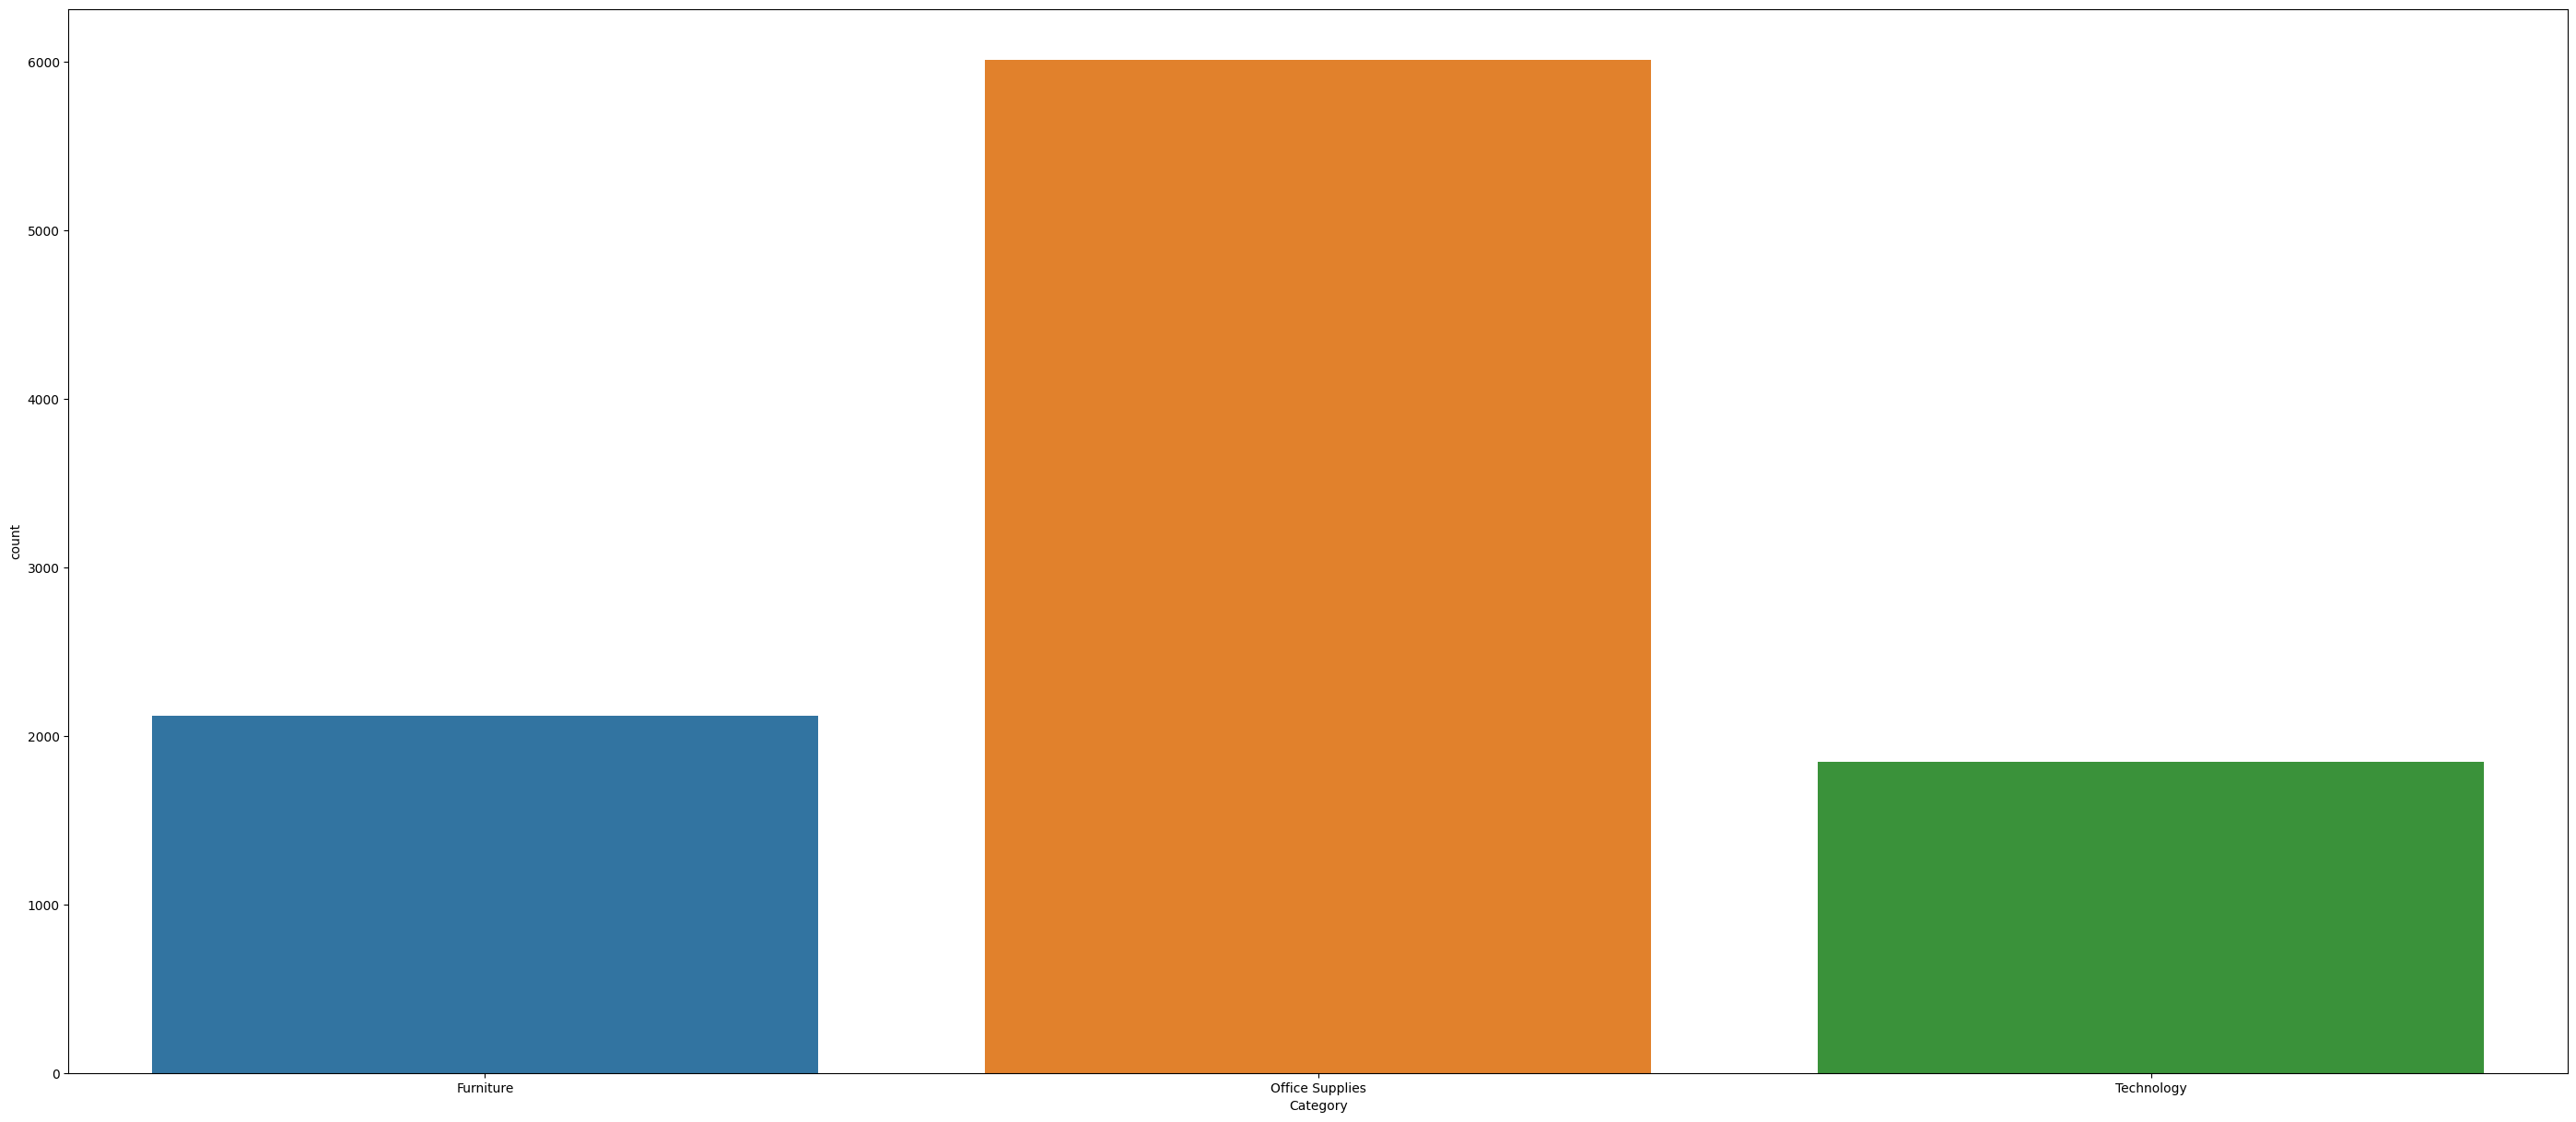

In [19]:
sns.countplot(x='Category', data=data, palette='tab10')

In [20]:
data['Sub-Category'].value_counts().head(10)

Sub-Category
Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Name: count, dtype: int64

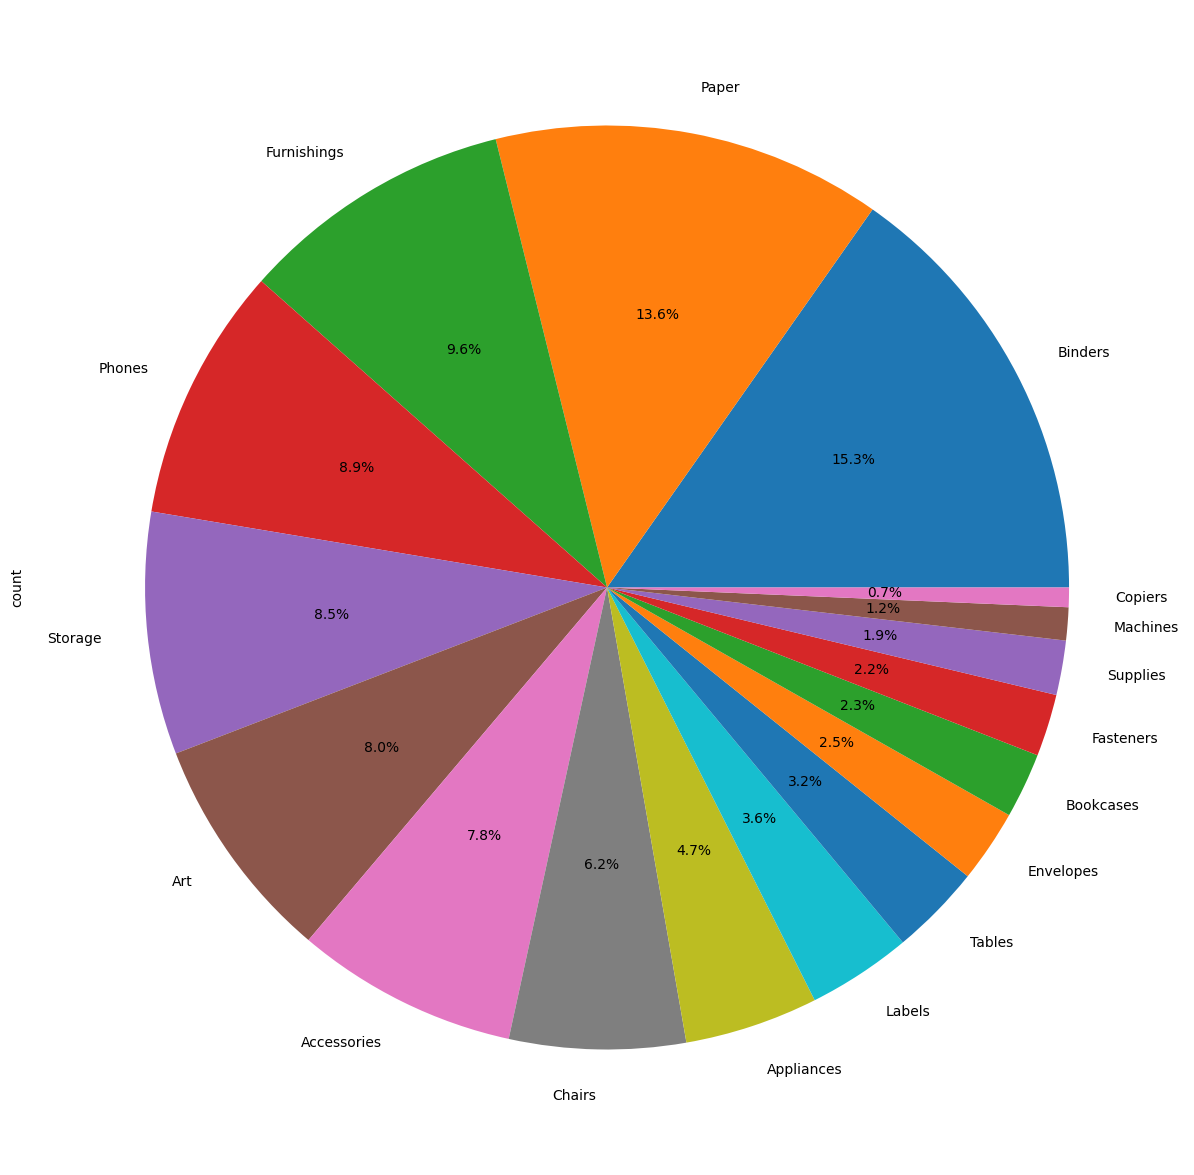

In [24]:
data['Sub-Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

#### state

/tmp/ipykernel_19619/1248069308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State',data=data,palette='rocket_r',order=data['State'].value_counts().index)


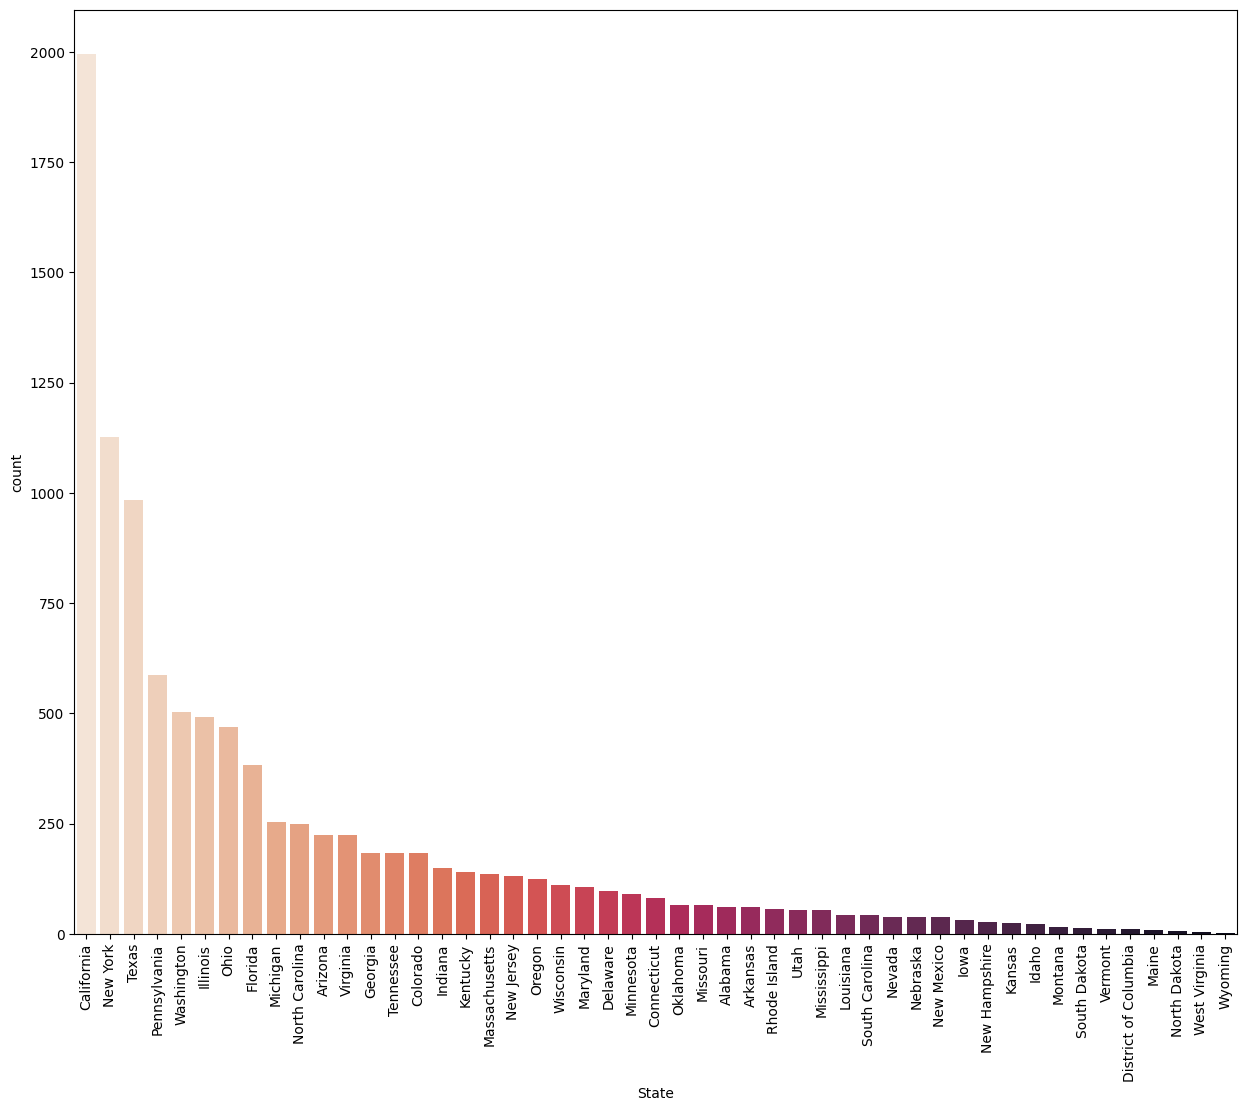

In [22]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=data,palette='rocket_r',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Regions

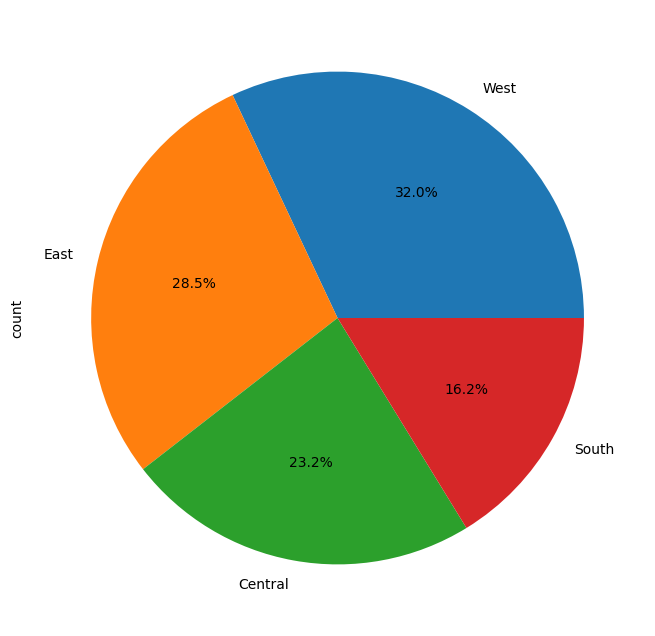

In [25]:
plt.figure(figsize=(10,8))
data['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

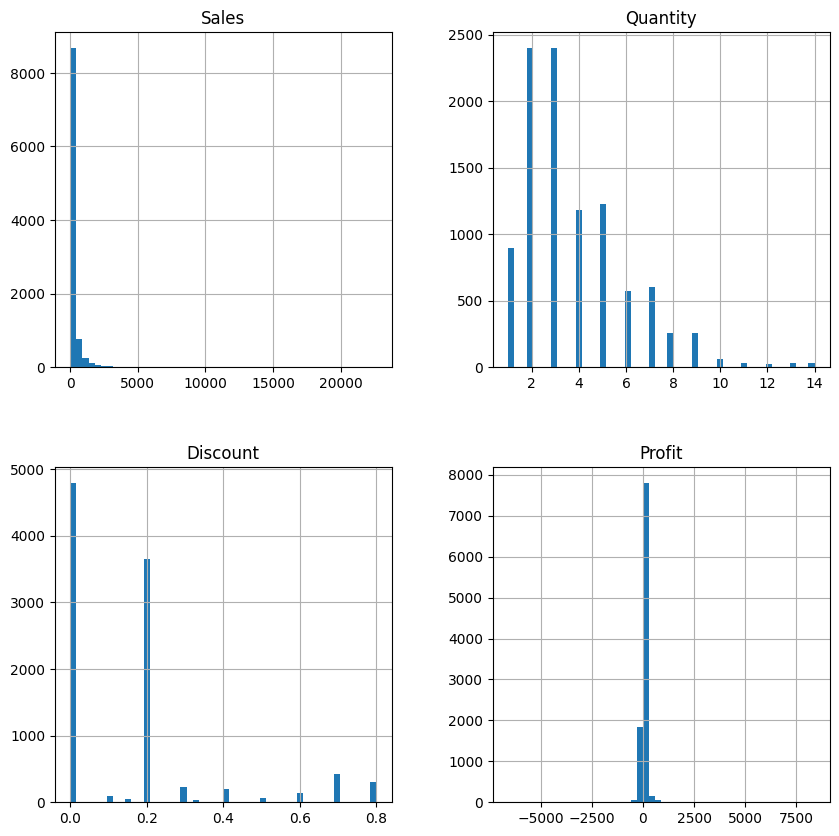

In [23]:
data[['Sales', 'Quantity', 'Discount', 'Profit']].hist(figsize=(10,10),bins=50)
plt.show()

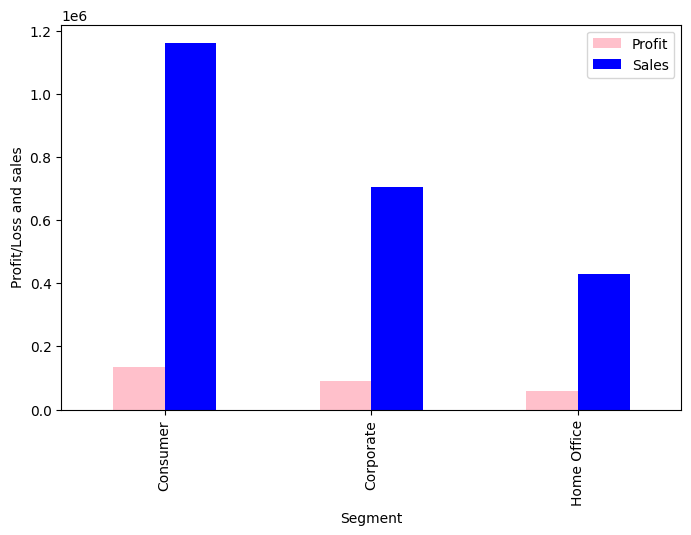

In [26]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

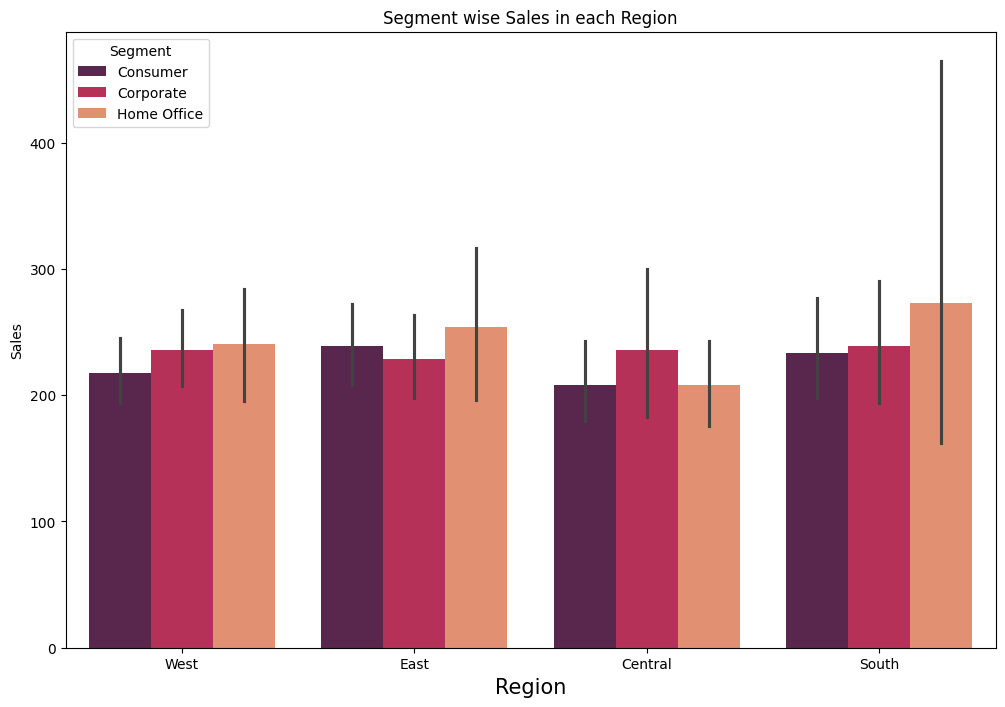

In [27]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

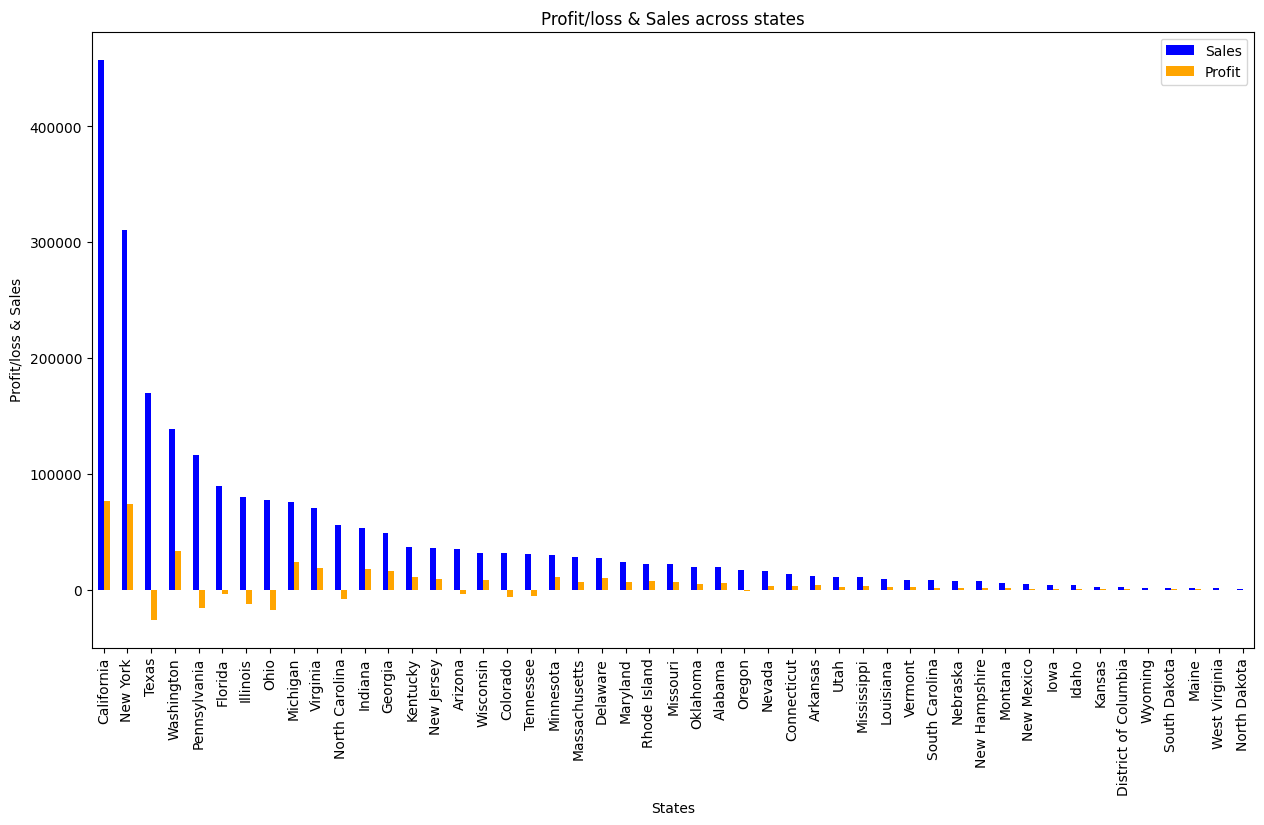

In [29]:
ps = data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()